# weather API for italy golfing retreat

In [1]:
import numpy as np 
import pandas as pd
import requests 
from pprint import pprint
import json 

In [2]:
api_key = 'a3725decdde20204e8c004359135e002'
lat = 41.9
lon = 12.6
country = 'Italy'


In [3]:
url = f'https://api.openweathermap.org/data/2.5/weather?q={country}&lat={lat}&lon={lon}&appid={api_key}'

In [4]:
response = requests.get(url)

In [5]:
response.status_code

200

In [6]:
response.headers

{'Server': 'openresty', 'Date': 'Tue, 15 Nov 2022 11:07:20 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '489', 'Connection': 'keep-alive', 'X-Cache-Key': '/data/2.5/weather?lat=41.9&lon=12.6&q=italy', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Methods': 'GET, POST'}

In [7]:
response.json()

{'coord': {'lon': -96.8847, 'lat': 32.184},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 277.41,
  'feels_like': 276.48,
  'temp_min': 276.8,
  'temp_max': 278.9,
  'pressure': 1027,
  'humidity': 85},
 'visibility': 10000,
 'wind': {'speed': 1.34, 'deg': 330, 'gust': 4.02},
 'clouds': {'all': 98},
 'dt': 1668510440,
 'sys': {'type': 2,
  'id': 2020745,
  'country': 'US',
  'sunrise': 1668517006,
  'sunset': 1668554866},
 'timezone': -21600,
 'id': 4700234,
 'name': 'Italy',
 'cod': 200}

In [8]:
df = pd.read_csv('PythonBox/Data_sources/rome_weather_jan_nov.csv')

In [9]:
import datetime as dt 

In [10]:
roma = pd.DataFrame(df)

In [11]:
roma.head()

,time,temperature_2m_max (Â°C),temperature_2m_min (Â°C),sunrise (iso8601),sunset (iso8601),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (mp/h),windgusts_10m_max (mp/h)
0,01/01/2022,14.6,9.4,2022-01-01T07:36,2022-01-01T16:51,0.0,0.0,8.1,12.8
1,02/01/2022,11.8,9.0,2022-01-02T07:36,2022-01-02T16:52,0.0,0.0,5.6,12.3
2,03/01/2022,14.8,9.4,2022-01-03T07:36,2022-01-03T16:53,0.0,0.0,6.3,9.4
3,04/01/2022,15.1,12.7,2022-01-04T07:36,2022-01-04T16:53,0.7,0.0,13.3,23.7
4,05/01/2022,16.4,12.1,2022-01-05T07:36,2022-01-05T16:54,7.7,0.0,21.6,39.4


In [12]:
roma.dtypes

time                         object
temperature_2m_max (Â°C)    float64
temperature_2m_min (Â°C)    float64
sunrise (iso8601)            object
sunset (iso8601)             object
rain_sum (mm)               float64
snowfall_sum (cm)           float64
windspeed_10m_max (mp/h)    float64
windgusts_10m_max (mp/h)    float64
dtype: object

In [13]:
roma['time'] = pd.to_datetime(roma['time'])

C:\Users\CallumO'Neill\AppData\Local\Temp\ipykernel_7860\1892207758.py:1: UserWarning: Parsing '13/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  roma['time'] = pd.to_datetime(roma['time'])
C:\Users\CallumO'Neill\AppData\Local\Temp\ipykernel_7860\1892207758.py:1: UserWarning: Parsing '14/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  roma['time'] = pd.to_datetime(roma['time'])
C:\Users\CallumO'Neill\AppData\Local\Temp\ipykernel_7860\1892207758.py:1: UserWarning: Parsing '15/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  roma['time'] = pd.to_datetime(roma['time'])
C:\Users\CallumO'Neill\AppData\Local\Temp\ipykernel_7860\1892207758.py:1: UserWarning: Parsing '16/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  roma['time'] = pd.to_datetime(ro

In [14]:
roma.dtypes

time                        datetime64[ns]
temperature_2m_max (Â°C)           float64
temperature_2m_min (Â°C)           float64
sunrise (iso8601)                   object
sunset (iso8601)                    object
rain_sum (mm)                      float64
snowfall_sum (cm)                  float64
windspeed_10m_max (mp/h)           float64
windgusts_10m_max (mp/h)           float64
dtype: object

In [15]:
roma['month'] = roma['time'].dt.month

In [16]:
roma.sort_values(by = 'month')

,time,temperature_2m_max (Â°C),temperature_2m_min (Â°C),sunrise (iso8601),sunset (iso8601),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (mp/h),windgusts_10m_max (mp/h),month
0,2022-01-01,14.6,9.4,2022-01-01T07:36,2022-01-01T16:51,0.0,0.0,8.1,12.8,1
23,2022-01-24,13.7,3.5,2022-01-24T07:28,2022-01-24T17:16,0.0,0.0,9.3,15.7,1
24,2022-01-25,10.8,2.6,2022-01-25T07:27,2022-01-25T17:17,0.0,0.0,9.9,13.9,1
25,2022-01-26,11.5,2.8,2022-01-26T07:26,2022-01-26T17:18,0.0,0.0,8.1,15.7,1
26,2022-01-27,12.7,4.9,2022-01-27T07:25,2022-01-27T17:20,0.0,0.0,6.7,11.6,1
...,...,...,...,...,...,...,...,...,...,...
101,2022-12-04,17.1,7.2,2022-04-12T05:32,2022-04-12T18:48,0.0,0.0,9.3,18.6,12
254,2022-12-09,28.3,20.3,2022-09-12T05:45,2022-09-12T18:26,0.0,0.0,8.8,17.4,12
131,2022-12-05,24.5,15.5,2022-05-12T04:51,2022-05-12T19:21,0.0,0.0,10.4,21.0,12
42,2022-12-02,15.1,5.8,2022-02-12T07:08,2022-02-12T17:40,0.0,0.0,5.2,10.3,12


In [17]:
roma

,time,temperature_2m_max (Â°C),temperature_2m_min (Â°C),sunrise (iso8601),sunset (iso8601),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (mp/h),windgusts_10m_max (mp/h),month
0,2022-01-01,14.6,9.4,2022-01-01T07:36,2022-01-01T16:51,0.0,0.0,8.1,12.8,1
1,2022-02-01,11.8,9.0,2022-01-02T07:36,2022-01-02T16:52,0.0,0.0,5.6,12.3,2
2,2022-03-01,14.8,9.4,2022-01-03T07:36,2022-01-03T16:53,0.0,0.0,6.3,9.4,3
3,2022-04-01,15.1,12.7,2022-01-04T07:36,2022-01-04T16:53,0.7,0.0,13.3,23.7,4
4,2022-05-01,16.4,12.1,2022-01-05T07:36,2022-01-05T16:54,7.7,0.0,21.6,39.4,5
...,...,...,...,...,...,...,...,...,...,...
300,2022-10-28,24.5,15.4,2022-10-28T06:36,2022-10-28T17:11,0.0,0.0,4.5,9.4,10
301,2022-10-29,24.5,15.9,2022-10-29T06:37,2022-10-29T17:10,0.0,0.0,5.8,11.6,10
302,2022-10-30,23.8,13.9,2022-10-30T06:38,2022-10-30T17:08,0.0,0.0,5.9,9.8,10
303,2022-10-31,24.2,13.5,2022-10-31T06:39,2022-10-31T17:07,0.0,0.0,6.5,13.0,10


In [18]:
roma_df = roma.rename(columns={'temperature_2m_max (Â°C)':'temp max (°C) at 2m',
                    'temperature_2m_min (Â°C)':'temp min (°C) at 2m',
                    'rain_sum (mm)':'total rain (mm)',
                    'snowfall_sum (cm)':'total snowfall (cm)',
                    'windspeed_10m_max (mp/h)':'windspeed max at 10m (mp/h)',
                    'windgusts_10m_max (mp/h)':'windgusts max at 10m (mp/h)'})

In [19]:
roma_df

,time,temp max (°C) at 2m,temp min (°C) at 2m,sunrise (iso8601),sunset (iso8601),total rain (mm),total snowfall (cm),windspeed max at 10m (mp/h),windgusts max at 10m (mp/h),month
0,2022-01-01,14.6,9.4,2022-01-01T07:36,2022-01-01T16:51,0.0,0.0,8.1,12.8,1
1,2022-02-01,11.8,9.0,2022-01-02T07:36,2022-01-02T16:52,0.0,0.0,5.6,12.3,2
2,2022-03-01,14.8,9.4,2022-01-03T07:36,2022-01-03T16:53,0.0,0.0,6.3,9.4,3
3,2022-04-01,15.1,12.7,2022-01-04T07:36,2022-01-04T16:53,0.7,0.0,13.3,23.7,4
4,2022-05-01,16.4,12.1,2022-01-05T07:36,2022-01-05T16:54,7.7,0.0,21.6,39.4,5
...,...,...,...,...,...,...,...,...,...,...
300,2022-10-28,24.5,15.4,2022-10-28T06:36,2022-10-28T17:11,0.0,0.0,4.5,9.4,10
301,2022-10-29,24.5,15.9,2022-10-29T06:37,2022-10-29T17:10,0.0,0.0,5.8,11.6,10
302,2022-10-30,23.8,13.9,2022-10-30T06:38,2022-10-30T17:08,0.0,0.0,5.9,9.8,10
303,2022-10-31,24.2,13.5,2022-10-31T06:39,2022-10-31T17:07,0.0,0.0,6.5,13.0,10


In [20]:
time_temp = roma_df.groupby('month')['temp max (°C) at 2m', 'temp min (°C) at 2m'].mean().reset_index()

C:\Users\CallumO'Neill\AppData\Local\Temp\ipykernel_7860\3972900279.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  time_temp = roma_df.groupby('month')['temp max (°C) at 2m', 'temp min (°C) at 2m'].mean().reset_index()


In [21]:
time_temp

,month,temp max (°C) at 2m,temp min (°C) at 2m
0,1,15.943333,8.360000
1,2,17.376923,10.161538
2,3,18.479310,10.537931
3,4,20.625000,13.282143
4,5,25.341379,17.348276
5,6,27.692857,19.657143
6,7,28.468966,20.937931
7,8,27.251724,19.979310
8,9,23.364286,16.764286
9,10,22.907143,15.453571


In [22]:
time_temp['Temperature range (°C)'] = time_temp['temp max (°C) at 2m'] - time_temp['temp min (°C) at 2m']

In [23]:
time_temp

,month,temp max (°C) at 2m,temp min (°C) at 2m,Temperature range (°C)
0,1,15.943333,8.360000,7.583333
1,2,17.376923,10.161538,7.215385
2,3,18.479310,10.537931,7.941379
3,4,20.625000,13.282143,7.342857
4,5,25.341379,17.348276,7.993103
5,6,27.692857,19.657143,8.035714
6,7,28.468966,20.937931,7.531034
7,8,27.251724,19.979310,7.272414
8,9,23.364286,16.764286,6.600000
9,10,22.907143,15.453571,7.453571


In [24]:
time_temp['month'] =time_temp['month'].replace(1,'January')
time_temp['month'] = time_temp['month'].replace(2,'February')
time_temp['month'] = time_temp['month'].replace(3,'March')
time_temp['month'] = time_temp['month'].replace(4,'April')
time_temp['month'] = time_temp['month'].replace(5,'May')
time_temp['month'] = time_temp['month'].replace(6,'June')
time_temp['month'] =time_temp['month'].replace(7,'July')
time_temp['month'] =time_temp['month'].replace(8,'August')
time_temp['month'] = time_temp['month'].replace(9,'September')
time_temp['month'] = time_temp['month'].replace(10,'October')
time_temp['month'] = time_temp['month'].replace(11,'November')
time_temp['month'] = time_temp['month'].replace(12,'December')

In [25]:
time_temp

,month,temp max (°C) at 2m,temp min (°C) at 2m,Temperature range (°C)
0,January,15.943333,8.360000,7.583333
1,February,17.376923,10.161538,7.215385
2,March,18.479310,10.537931,7.941379
3,April,20.625000,13.282143,7.342857
4,May,25.341379,17.348276,7.993103
5,June,27.692857,19.657143,8.035714
6,July,28.468966,20.937931,7.531034
7,August,27.251724,19.979310,7.272414
8,September,23.364286,16.764286,6.600000
9,October,22.907143,15.453571,7.453571


In [26]:
import seaborn as sns 
import matplotlib.pyplot as plt 

## Temperature range month on month 

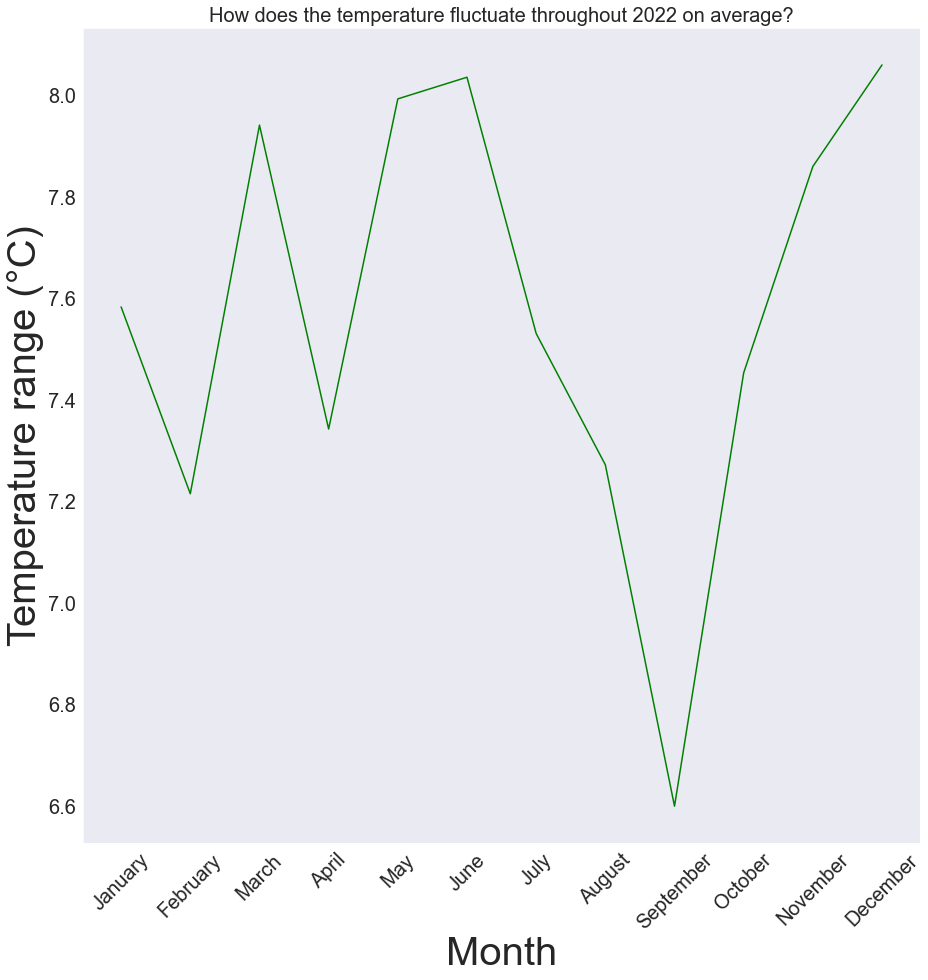

In [217]:
plt.figure(figsize = (15,15))
sns.lineplot(x='month', y ='Temperature range (°C)', data = time_temp, color = 'green')
plt.title('How does the temperature fluctuate throughout 2022 on average?', fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel('Month', fontsize = 40)
plt.ylabel('Temperature range (°C)', fontsize = 40)
plt.yticks(fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

## max and min temp month on month 

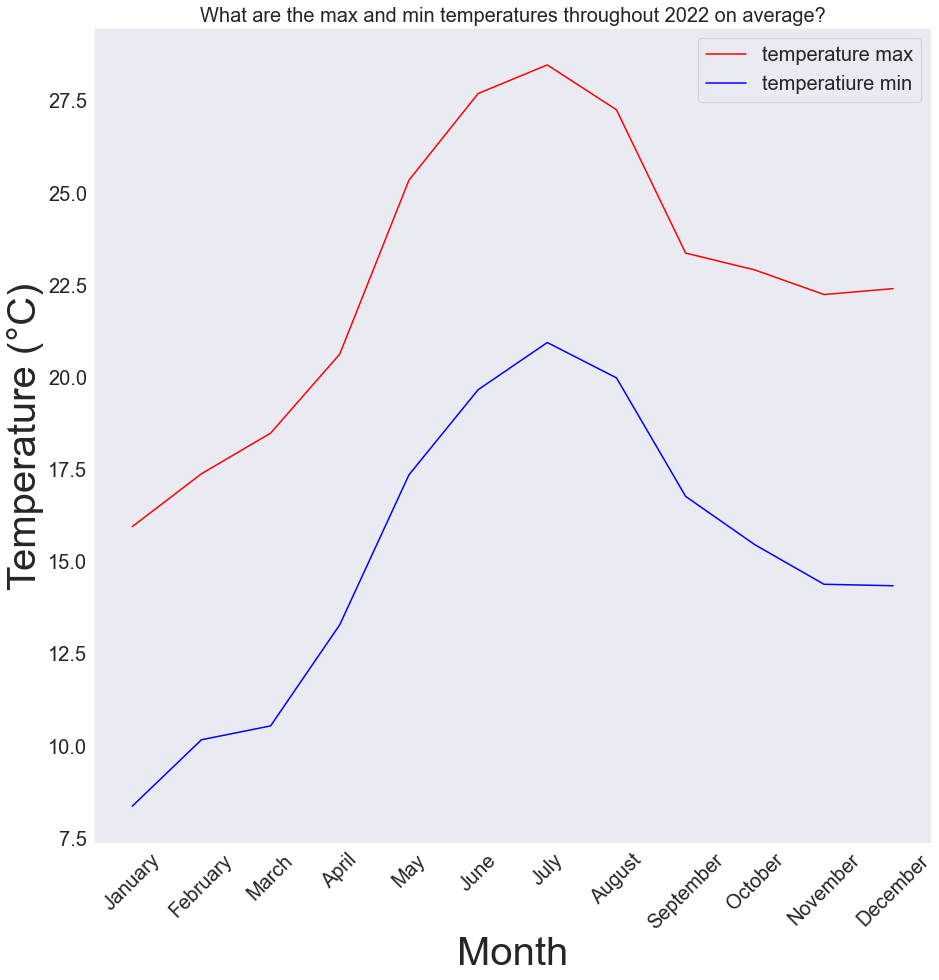

In [216]:
plt.figure(figsize = (15,15))
plt.plot(time_temp['month'], time_temp['temp max (°C) at 2m'], color = 'red')
plt.plot(time_temp['month'], time_temp['temp min (°C) at 2m'], color = 'blue')
plt.title('What are the max and min temperatures throughout 2022 on average?', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Month', fontsize = 40)
plt.ylabel('Temperature (°C)', fontsize = 40)
plt.xticks(rotation = 45)
plt.legend(['temperature max', 'temperatiure min'], fontsize = 20)
plt.show()

## rainfall analysis 

In [44]:
roma_df

,time,temp max (°C) at 2m,temp min (°C) at 2m,sunrise (iso8601),sunset (iso8601),total rain (mm),total snowfall (cm),windspeed max at 10m (mp/h),windgusts max at 10m (mp/h),month
0,2022-01-01,14.6,9.4,2022-01-01T07:36,2022-01-01T16:51,0.0,0.0,8.1,12.8,1
1,2022-02-01,11.8,9.0,2022-01-02T07:36,2022-01-02T16:52,0.0,0.0,5.6,12.3,2
2,2022-03-01,14.8,9.4,2022-01-03T07:36,2022-01-03T16:53,0.0,0.0,6.3,9.4,3
3,2022-04-01,15.1,12.7,2022-01-04T07:36,2022-01-04T16:53,0.7,0.0,13.3,23.7,4
4,2022-05-01,16.4,12.1,2022-01-05T07:36,2022-01-05T16:54,7.7,0.0,21.6,39.4,5
...,...,...,...,...,...,...,...,...,...,...
300,2022-10-28,24.5,15.4,2022-10-28T06:36,2022-10-28T17:11,0.0,0.0,4.5,9.4,10
301,2022-10-29,24.5,15.9,2022-10-29T06:37,2022-10-29T17:10,0.0,0.0,5.8,11.6,10
302,2022-10-30,23.8,13.9,2022-10-30T06:38,2022-10-30T17:08,0.0,0.0,5.9,9.8,10
303,2022-10-31,24.2,13.5,2022-10-31T06:39,2022-10-31T17:07,0.0,0.0,6.5,13.0,10


In [45]:
roma_df.dtypes

time                           datetime64[ns]
temp max (°C) at 2m                   float64
temp min (°C) at 2m                   float64
sunrise (iso8601)                      object
sunset (iso8601)                       object
total rain (mm)                       float64
total snowfall (cm)                   float64
windspeed max at 10m (mp/h)           float64
windgusts max at 10m (mp/h)           float64
month                                   int64
dtype: object

In [46]:
time_rain = roma_df.groupby('month')['total rain (mm)'].mean().reset_index()

In [47]:
time_rain

,month,total rain (mm)
0,1,0.516667
1,2,1.415385
2,3,0.968966
3,4,0.700000
4,5,0.389655
5,6,0.250000
6,7,0.386207
7,8,0.720690
8,9,5.603571
9,10,0.092593


In [48]:
time_rain['month'] =time_rain['month'].replace(1,'January')
time_rain['month'] = time_rain['month'].replace(2,'February')
time_rain['month'] = time_rain['month'].replace(3,'March')
time_rain['month'] = time_rain['month'].replace(4,'April')
time_rain['month'] = time_rain['month'].replace(5,'May')
time_rain['month'] = time_rain['month'].replace(6,'June')
time_rain['month'] =time_rain['month'].replace(7,'July')
time_rain['month'] =time_rain['month'].replace(8,'August')
time_rain['month'] = time_rain['month'].replace(9,'September')
time_rain['month'] = time_rain['month'].replace(10,'October')
time_rain['month'] = time_rain['month'].replace(11,'November')
time_rain['month'] = time_rain['month'].replace(12,'December')

In [49]:
time_rain

,month,total rain (mm)
0,January,0.516667
1,February,1.415385
2,March,0.968966
3,April,0.700000
4,May,0.389655
5,June,0.250000
6,July,0.386207
7,August,0.720690
8,September,5.603571
9,October,0.092593


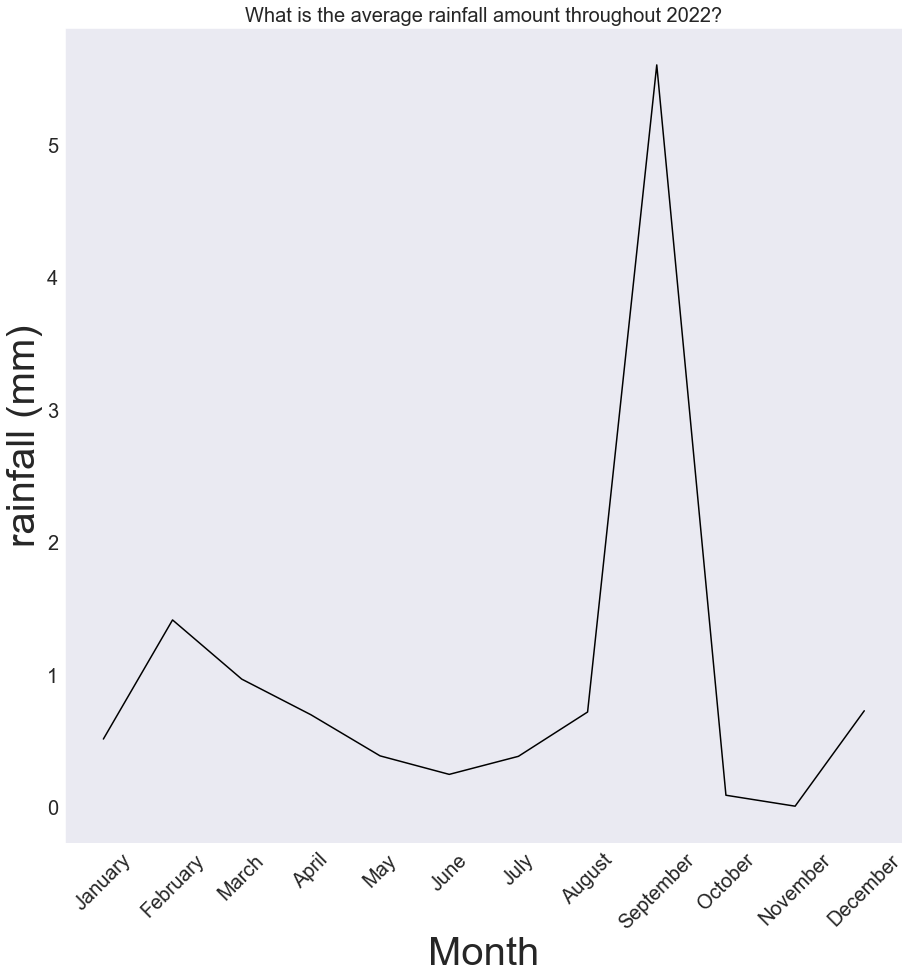

In [213]:
plt.figure(figsize = (15,15))
sns.lineplot(x = 'month', y = 'total rain (mm)', data = time_rain, color = 'black')
sns.set_style('dark')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('What is the average rainfall amount throughout 2022?', fontsize = 20)
plt.xlabel('Month', fontsize = 40)
plt.ylabel('rainfall (mm)', fontsize = 40)
plt.xticks(rotation = 45)
plt.show()



In [214]:
time_rain['total rain (mm)'].sum()

11.783732544594614

In [215]:
perc = (5.603571/time_rain['total rain (mm)'].sum())*100
perc

47.553446913308015

In [56]:
roma_df

,time,temp max (°C) at 2m,temp min (°C) at 2m,sunrise (iso8601),sunset (iso8601),total rain (mm),total snowfall (cm),windspeed max at 10m (mp/h),windgusts max at 10m (mp/h),month
0,2022-01-01,14.6,9.4,2022-01-01T07:36,2022-01-01T16:51,0.0,0.0,8.1,12.8,1
1,2022-02-01,11.8,9.0,2022-01-02T07:36,2022-01-02T16:52,0.0,0.0,5.6,12.3,2
2,2022-03-01,14.8,9.4,2022-01-03T07:36,2022-01-03T16:53,0.0,0.0,6.3,9.4,3
3,2022-04-01,15.1,12.7,2022-01-04T07:36,2022-01-04T16:53,0.7,0.0,13.3,23.7,4
4,2022-05-01,16.4,12.1,2022-01-05T07:36,2022-01-05T16:54,7.7,0.0,21.6,39.4,5
...,...,...,...,...,...,...,...,...,...,...
300,2022-10-28,24.5,15.4,2022-10-28T06:36,2022-10-28T17:11,0.0,0.0,4.5,9.4,10
301,2022-10-29,24.5,15.9,2022-10-29T06:37,2022-10-29T17:10,0.0,0.0,5.8,11.6,10
302,2022-10-30,23.8,13.9,2022-10-30T06:38,2022-10-30T17:08,0.0,0.0,5.9,9.8,10
303,2022-10-31,24.2,13.5,2022-10-31T06:39,2022-10-31T17:07,0.0,0.0,6.5,13.0,10


In [57]:
roma_df.dtypes

time                           datetime64[ns]
temp max (°C) at 2m                   float64
temp min (°C) at 2m                   float64
sunrise (iso8601)                      object
sunset (iso8601)                       object
total rain (mm)                       float64
total snowfall (cm)                   float64
windspeed max at 10m (mp/h)           float64
windgusts max at 10m (mp/h)           float64
month                                   int64
dtype: object

## daylight duration

In [58]:
roma_df['sunrise_hour'] = pd.to_datetime(roma_df['sunrise (iso8601)'])
roma_df['sunset_hour'] = pd.to_datetime(roma_df['sunset (iso8601)'])

In [61]:
roma_df['sunrise_hour'] = roma_df['sunrise_hour'].dt.hour
roma_df['sunset_hour'] = roma_df['sunset_hour'].dt.hour

In [62]:
roma_df

,time,temp max (°C) at 2m,temp min (°C) at 2m,sunrise (iso8601),sunset (iso8601),total rain (mm),total snowfall (cm),windspeed max at 10m (mp/h),windgusts max at 10m (mp/h),month,sunrise_hour,sunset_hour
0,2022-01-01,14.6,9.4,2022-01-01T07:36,2022-01-01T16:51,0.0,0.0,8.1,12.8,1,7,16
1,2022-02-01,11.8,9.0,2022-01-02T07:36,2022-01-02T16:52,0.0,0.0,5.6,12.3,2,7,16
2,2022-03-01,14.8,9.4,2022-01-03T07:36,2022-01-03T16:53,0.0,0.0,6.3,9.4,3,7,16
3,2022-04-01,15.1,12.7,2022-01-04T07:36,2022-01-04T16:53,0.7,0.0,13.3,23.7,4,7,16
4,2022-05-01,16.4,12.1,2022-01-05T07:36,2022-01-05T16:54,7.7,0.0,21.6,39.4,5,7,16
...,...,...,...,...,...,...,...,...,...,...,...,...
300,2022-10-28,24.5,15.4,2022-10-28T06:36,2022-10-28T17:11,0.0,0.0,4.5,9.4,10,6,17
301,2022-10-29,24.5,15.9,2022-10-29T06:37,2022-10-29T17:10,0.0,0.0,5.8,11.6,10,6,17
302,2022-10-30,23.8,13.9,2022-10-30T06:38,2022-10-30T17:08,0.0,0.0,5.9,9.8,10,6,17
303,2022-10-31,24.2,13.5,2022-10-31T06:39,2022-10-31T17:07,0.0,0.0,6.5,13.0,10,6,17


In [63]:
roma_df['daylight_duration'] = roma_df['sunset_hour'] - roma_df['sunrise_hour']

In [64]:
roma_df

,time,temp max (°C) at 2m,temp min (°C) at 2m,sunrise (iso8601),sunset (iso8601),total rain (mm),total snowfall (cm),windspeed max at 10m (mp/h),windgusts max at 10m (mp/h),month,sunrise_hour,sunset_hour,daylight_duration
0,2022-01-01,14.6,9.4,2022-01-01T07:36,2022-01-01T16:51,0.0,0.0,8.1,12.8,1,7,16,9
1,2022-02-01,11.8,9.0,2022-01-02T07:36,2022-01-02T16:52,0.0,0.0,5.6,12.3,2,7,16,9
2,2022-03-01,14.8,9.4,2022-01-03T07:36,2022-01-03T16:53,0.0,0.0,6.3,9.4,3,7,16,9
3,2022-04-01,15.1,12.7,2022-01-04T07:36,2022-01-04T16:53,0.7,0.0,13.3,23.7,4,7,16,9
4,2022-05-01,16.4,12.1,2022-01-05T07:36,2022-01-05T16:54,7.7,0.0,21.6,39.4,5,7,16,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2022-10-28,24.5,15.4,2022-10-28T06:36,2022-10-28T17:11,0.0,0.0,4.5,9.4,10,6,17,11
301,2022-10-29,24.5,15.9,2022-10-29T06:37,2022-10-29T17:10,0.0,0.0,5.8,11.6,10,6,17,11
302,2022-10-30,23.8,13.9,2022-10-30T06:38,2022-10-30T17:08,0.0,0.0,5.9,9.8,10,6,17,11
303,2022-10-31,24.2,13.5,2022-10-31T06:39,2022-10-31T17:07,0.0,0.0,6.5,13.0,10,6,17,11


In [67]:
daylight_roma = roma_df.groupby('month')['daylight_duration'].mean().reset_index()

In [68]:
daylight_roma

,month,daylight_duration
0,1,10.900000
1,2,11.423077
2,3,12.379310
3,4,13.142857
4,5,14.206897
5,6,14.178571
6,7,14.137931
7,8,13.275862
8,9,12.607143
9,10,11.586207


In [74]:
daylight_roma['month'] =daylight_roma['month'].replace(1,'January')
daylight_roma['month'] = daylight_roma['month'].replace(2,'February')
daylight_roma['month'] = daylight_roma['month'].replace(3,'March')
daylight_roma['month'] = daylight_roma['month'].replace(4,'April')
daylight_roma['month'] = daylight_roma['month'].replace(5,'May')
daylight_roma['month'] = daylight_roma['month'].replace(6,'June')
daylight_roma['month'] =daylight_roma['month'].replace(7,'July')
daylight_roma['month'] =daylight_roma['month'].replace(8,'August')
daylight_roma['month']= daylight_roma['month'].replace(9,'September')
daylight_roma['month'] =daylight_roma['month'].replace(10,'October')
daylight_roma['month'] =daylight_roma['month'].replace(11,'November')
daylight_roma['month'] = daylight_roma['month'].replace(12,'December')

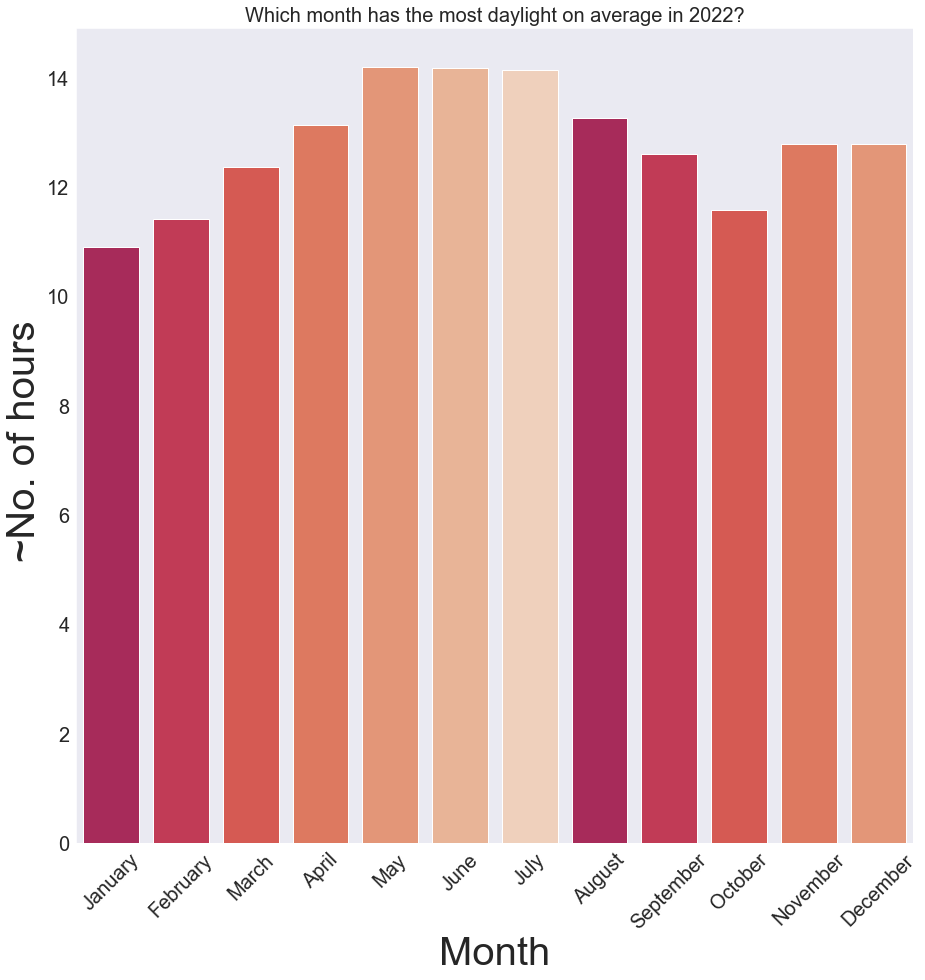

In [212]:
plt.figure(figsize = (15,15))
pal = sns.color_palette("rocket", len(daylight_roma))
sns.barplot(x = 'month', y='daylight_duration', palette = pal[5:16], data=daylight_roma)
sns.color_palette("rocket")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Which month has the most daylight on average in 2022?', fontsize = 20)
plt.xlabel('Month', fontsize = 40)
plt.ylabel('~No. of hours ', fontsize = 40)
plt.xticks(rotation = 45)
plt.show()


In [218]:
roma_df

,time,temp max (°C) at 2m,temp min (°C) at 2m,sunrise (iso8601),sunset (iso8601),total rain (mm),total snowfall (cm),windspeed max at 10m (mp/h),windgusts max at 10m (mp/h),month,sunrise_hour,sunset_hour,daylight_duration
0,2022-01-01,14.6,9.4,2022-01-01T07:36,2022-01-01T16:51,0.0,0.0,8.1,12.8,1,7,16,9
1,2022-02-01,11.8,9.0,2022-01-02T07:36,2022-01-02T16:52,0.0,0.0,5.6,12.3,2,7,16,9
2,2022-03-01,14.8,9.4,2022-01-03T07:36,2022-01-03T16:53,0.0,0.0,6.3,9.4,3,7,16,9
3,2022-04-01,15.1,12.7,2022-01-04T07:36,2022-01-04T16:53,0.7,0.0,13.3,23.7,4,7,16,9
4,2022-05-01,16.4,12.1,2022-01-05T07:36,2022-01-05T16:54,7.7,0.0,21.6,39.4,5,7,16,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2022-10-28,24.5,15.4,2022-10-28T06:36,2022-10-28T17:11,0.0,0.0,4.5,9.4,10,6,17,11
301,2022-10-29,24.5,15.9,2022-10-29T06:37,2022-10-29T17:10,0.0,0.0,5.8,11.6,10,6,17,11
302,2022-10-30,23.8,13.9,2022-10-30T06:38,2022-10-30T17:08,0.0,0.0,5.9,9.8,10,6,17,11
303,2022-10-31,24.2,13.5,2022-10-31T06:39,2022-10-31T17:07,0.0,0.0,6.5,13.0,10,6,17,11


In [220]:
wind_roma = roma_df.groupby('month')['windspeed max at 10m (mp/h)'].mean().reset_index()

In [221]:
wind_roma['month'] =wind_roma['month'] .replace(1,'January')
wind_roma['month']  = wind_roma['month'] .replace(2,'February')
wind_roma['month']  = wind_roma['month'] .replace(3,'March')
wind_roma['month']  = wind_roma['month'] .replace(4,'April')
wind_roma['month']  = wind_roma['month'] .replace(5,'May')
wind_roma['month']  = wind_roma['month'] .replace(6,'June')
wind_roma['month']  =wind_roma['month'] .replace(7,'July')
wind_roma['month']  =wind_roma['month'] .replace(8,'August')
wind_roma['month'] = wind_roma['month'] .replace(9,'September')
wind_roma['month']  =wind_roma['month'] .replace(10,'October')
wind_roma['month']  =wind_roma['month'] .replace(11,'November')
wind_roma['month']  = wind_roma['month'] .replace(12,'December')

In [222]:
wind_roma

,month,windspeed max at 10m (mp/h)
0,January,9.710000
1,February,11.076923
2,March,9.541379
3,April,10.525000
4,May,11.317241
5,June,11.267857
6,July,10.372414
7,August,11.162069
8,September,12.421429
9,October,8.853571


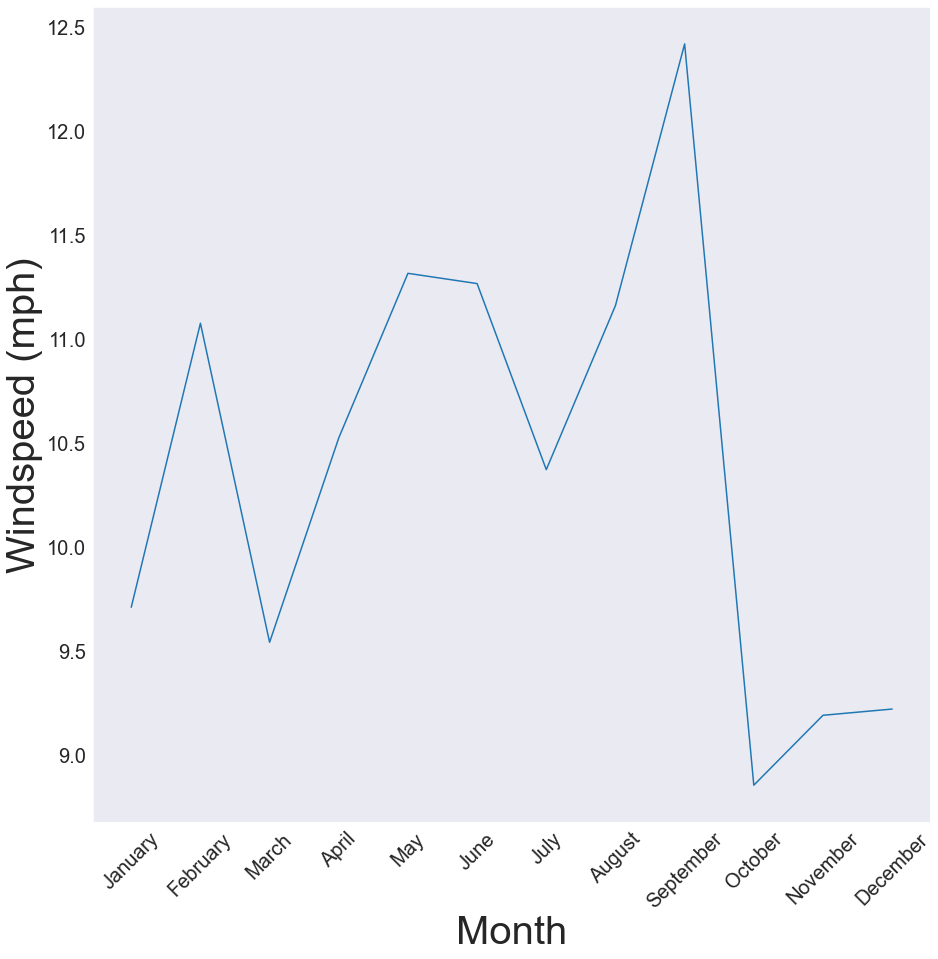

In [225]:
plt.figure(figsize = (15,15))
sns.lineplot(x = 'month', y='windspeed max at 10m (mp/h)', data=wind_roma)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Month', fontsize = 40)
plt.ylabel('Windspeed (mph)', fontsize = 40)
plt.xticks(rotation = 45)
plt.show()
